# Laporan Proyek Machine Learning - Ahmad Kholish Fauzan Shobiry

## Project Overview
### Latar Belakang
Proyek ini bertujuan untuk mengembangkan sistem rekomendasi lagu berbasis konten (Content-Based Filtering) menggunakan fitur deskriptif dari lagu seperti nama lagu, artis, album, dan genre. Sistem ini akan membantu pengguna menemukan lagu yang mirip dengan preferensi mereka berdasarkan kesamaan fitur musik.

### Tujuan Proyek
Proyek ini bertujuan untuk membangun sistem rekomendasi musik berbasis content-based filtering dengan tujuan:
1. Membantu pengguna menemukan lagu-lagu baru yang mirip dengan lagu favorit mereka.
2. Memberikan pengalaman mendengarkan musik yang lebih personal dan relevan.
3. Memanfaatkan fitur audio dari lagu seperti danceability, valence, dan tempo untuk menghasilkan rekomendasi yang sesuai dengan preferensi pengguna.

### Ruang Lingkup
Proyek difokuskan pada sistem rekomendasi lagu berbasis content-based filtering dengan pendekatan sebagai berikut:
1. Dataset yang digunakan adalah Spotify Tracks Dataset dari Kaggle.
2. Sistem akan menggunakan fitur-fitur numerik seperti danceability, energy, acousticness, valence, dan tempo untuk menghitung kemiripan antar lagu.
3. Rekomendasi dihasilkan dengan menghitung similarity menggunakan ANN antar lagu berdasarkan fitur audio.

### Referensi
- [Dataset: Spotify Tracks Dataset – Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

## Business Understanding
### Problem Statements
1. Bagaimana cara merekomendasikan lagu yang serupa dengan lagu favorit pengguna berdasarkan fitur-fitur kontennya?
2. Bagaimana membantu pengguna menemukan lagu baru yang sesuai dengan selera musik mereka tanpa harus mencari secara manual?

### Goals
1. Mengembangkan sistem rekomendasi lagu berbasis konten yang dapat menyarankan lagu-lagu serupa dari fitur yang tersedia seperti nama lagu, artis, genre, dan album.
2. Meningkatkan pengalaman pengguna dalam menemukan musik baru dengan pendekatan personal dan otomatis.

### Solution Statements
1. Pendekatan: Content-Based Filtering dengan menggunakan fitur-fitur deskriptif (track_name, artists, album_name, track_genre) yang diubah menjadi representasi vektor menggunakan TF-IDF, lalu dihitung kesamaannya menggunakan ANN.
2. Fitur tambahan: Potensi penggunaan fitur audio seperti danceability, energy, valence, atau tempo untuk meningkatkan kualitas rekomendasi (di tahap pengembangan lanjutan).
3. Mengukur hasil rekomendasi menggunakan Cosine Similarity untuk mengetahui keakuratan hasil rekomendasi.

## Data Understanding
Dataset yang digunakan adalah Spotify Tracks Dataset yang berisi 114.000 lagu dari 125 genre berbeda. Setiap lagu memiliki informasi deskriptif serta fitur audio yang diperoleh dari Spotify API.

### Format File
Dataset disimpan dalam format .csv dan telah dimuat ke Google Colab melalui path: /kaggle/input/-spotify-tracks-dataset/dataset.csv.

### Statistik Dataset
1. Jumlah lagu: 114.000
2. Jumlah genre: 114
3. Jumlah artis unik: ribuan
4. Distribusi genre cukup seimbang: sebagian besar genre memiliki 1.000 lagu

### Variabel dalam Dataset
Berikut merupakan variabel-variabel dalam dataset, antara lain:
1. track_id: ID unik lagu dari Spotify.
2. artists: Nama penyanyi atau grup musik; jika lebih dari satu, dipisahkan dengan tanda titik koma (;).
3. album_name: Nama album tempat lagu tersebut dimuat.
4. track_name: Judul lagunya
5. popularity: Tingkat popularitas lagu (skala 0–100); makin tinggi berarti makin sering didengarkan saat ini.
6. duration_ms: Durasi lagu dalam milidetik
7. explicit: Apakah lagu mengandung lirik eksplisit (true = ya, false = tidak/kurang jelas).
8. danceability: Seberapa cocok lagu untuk menari (0.0 = tidak cocok, 1.0 = sangat cocok).
9. energy: Ukuran intensitas dan aktivitas lagu (0.0 = tenang, 1.0 = sangat energik).
10. key: Nada dasar lagu (0 = C, 1 = C♯/D♭, dst; -1 jika tidak terdeteksi).
11. loudness: Tingkat keras suara lagu dalam desibel (dB)
12. mode: Skala lagu; 1 = mayor (ceria), 0 = minor (sedih).
13. speechiness: Seberapa banyak unsur bicara dalam lagu (0.0 = musik murni, 1.0 = penuh bicara)
14. acousticness: Keyakinan bahwa lagu bersifat akustik (0.0 = tidak akustik, 1.0 = sangat akustik).
15. instrumentalness: Perkiraan bahwa lagu tidak memiliki vokal (0.0 = banyak vokal, 1.0 = full instrumental).
16. liveness: Kemungkinan lagu direkam secara langsung di hadapan penonton (nilai > 0.8 = kemungkinan besar live).
17. valence: Tingkat nuansa emosional positif dalam lagu (0.0 = sedih, 1.0 = bahagia).
18. tempo: Kecepatan lagu dalam beat per menit (BPM).
19. time_signature: Tanda birama lagu (jumlah ketukan per bar; biasanya antara 3 sampai 7).
20. track_genre: Genre atau jenis musik lagu tersebut.

## Data Preparation
Pada tahap ini, dilakukan sejumlah proses pembersihan dan transformasi data untuk memastikan bahwa dataset siap digunakan dalam pengembangan sistem rekomendasi musik. Beberapa langkah utama yang dilakukan meliputi:

1. Mengatasi Missing Values
<br>Beberapa kolom dalam dataset dapat mengandung nilai kosong (NaN) yang perlu ditangani agar tidak mengganggu proses pembentukan fitur dan pemodelan sistem rekomendasi. Strategi yang digunakan antara lain:
<br> - Menghapus baris dengan nilai kosong pada kolom penting seperti track_name, artists, dan fitur audio (danceability, energy, dll).
<br> - Untuk kolom seperti album_name, dapat diisi dengan string kosong ("") jika dianggap tidak terlalu mempengaruhi rekomendasi.

2. Memastikan Tipe Data
<br>Beberapa kolom perlu dikonversi ke tipe data yang sesuai agar proses analisis dan komputasi berjalan dengan optimal:
<br> - Kolom duration_ms dikonversi menjadi detik agar lebih mudah dibaca.
<br> - Kolom explicit dikonversi ke tipe boolean (True/False).
<br> - Kolom numerik seperti popularity, danceability, energy, valence, dan tempo dikonversi ke tipe float untuk kebutuhan pemodelan.

3. Membuat Fitur Gabungan
<br>Untuk mendukung pendekatan content-based filtering, dibuat representasi fitur numerik yang dapat digunakan untuk menghitung kemiripan antar lagu:
<br> - Digunakan fitur-fitur audio utama yang bersifat numerik seperti:
  1. danceability
  2. energy
  3. valence
  4. acousticness
  5. instrumentalness
  6. tempo
  7. speechiness
  8. liveness
  
<br>Kolom track_genre juga dapat digunakan sebagai informasi tambahan untuk segmentasi atau analisis deskriptif.

Fitur-fitur ini akan digunakan dalam proses ekstraksi vektor fitur dan perhitungan similarity antar lagu untuk menghasilkan rekomendasi.

In [64]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/-spotify-tracks-dataset


In [65]:
# Import library dasar
import pandas as pd
import numpy as np

In [66]:
# Load dataset
df = pd.read_csv('/kaggle/input/-spotify-tracks-dataset/dataset.csv')

# Tampilkan 5 data teratas
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [67]:
# Lihat info dataset
df.info()

# Cek missing values
df.isnull().sum()

# Cek jumlah genre unik
print(f"Jumlah genre unik: {df['track_genre'].nunique()}")
print(df['track_genre'].value_counts().head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Dataset memiliki 114.000 baris dan 21 kolom, dengan kolom penting seperti track_name, artists, album_name, dan track_genre hampir seluruhnya lengkap (hanya 1 missing value per kolom teks). Terdapat 114 genre unik dengan jumlah lagu per genre relatif seimbang (seribu lagu per genre).


---

Diketahui bahwa kolom teks seperti track_name, artists, dan album_name memiliki 1 missing value. Karena ini merupakan sistem rekomendasi dimana berbasis Content-Based Filtering, maka 3 kolom tersebut sangat penting untuk diketahui isinya, karena terdapat missing value pada 3 kolom tersebut dan jumlahnya sangat sedikit, maka bisa dihapus saja karena tidak akan memperngaruhi pengolahan data keseluruhan.

In [68]:
# Mengisi missing value pada kolom teks deskriptif
text_cols = ['track_name', 'artists', 'album_name']
df[text_cols] = df[text_cols].fillna("")

# Cek apakah masih ada missing value
print(df[text_cols].isnull().sum())

track_name    0
artists       0
album_name    0
dtype: int64


In [69]:
# Untuk memastikan tidak ada duplikasi dalam judul lagu, maka track_name dengan nilai yang sama akan di drop berdasarkan tingkat popularitynya
df = df.sort_values(by='popularity', ascending=False)
df = df.drop_duplicates(subset='track_name', keep='first')

In [70]:
# Memastikan bahwa hasil rekomendasi menampilkan Lagu yang memiliki judul saja
df = df[~df['track_name'].isnull()]
df = df[df['track_name'].str.strip() != '']

In [71]:
# Memastikan bahwa hasil rekomendasi menampilkan Lagu dengan nama Band atau Penyanyi yang jelas saja
df = df[~df['artists'].isnull()]
df = df[df['artists'].str.strip() != '']
df = df.reset_index(drop=True)

In [72]:
# Memastikan popularitas dan durasi bertipe numerik
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')

Selanjutnya membuat kolom combined_features yang menggabungkan informasi dari: track_name, artists, album_name, dan track_genre. Gabungan ini akan menjadi dasar sistem rekomendasi berbasis konten.

In [73]:
# Fungsi untuk menggabungkan fitur-fitur deskriptif
def combine_features(row):
    return (
        row['track_name'] + ' ' +
        (row['artists'] + ' ') * 2 +     # Artist dibobotkan 2x
        (row['album_name'] + ' ') +      # Album 1x
        (row['track_genre'] + ' ') * 3   # Genre dibobotkan 3x
    ).lower()

# Terapkan ke dataframe
df['combined_features'] = df.apply(combine_features, axis=1)

# Cek hasil awal
df[['track_name', 'combined_features']].head()

,track_name,combined_features
0,Unholy (feat. Kim Petras),unholy (feat. kim petras) sam smith;kim petras...
1,"Quevedo: Bzrp Music Sessions, Vol. 52","quevedo: bzrp music sessions, vol. 52 bizarrap..."
2,La Bachata,la bachata manuel turizo manuel turizo la bach...
3,I'm Good (Blue),i'm good (blue) david guetta;bebe rexha david ...
4,Me Porto Bonito,me porto bonito bad bunny;chencho corleone bad...


## Modelling

Sesuai dengan Solution Statements yang telah ditentukan, sistem rekomendasi musik ini akan dikembangkan melalui beberapa pendekatan, antara lain:


- **Pendekatan 1: Content-Based Filtering Berbasis Metadata Teks**
<br> Sistem merekomendasikan lagu berdasarkan kemiripan konten deskriptif dari lagu yang dipilih oleh pengguna. Informasi yang digunakan meliputi:
<br> - track_name (judul lagu)
<br> - artists (nama penyanyi atau band)
<br> - album_name (nama album)
<br> - track_genre (genre musik)
<br>Seluruh informasi tersebut digabung dalam satu kolom bernama combined_features, kemudian direpresentasikan sebagai vektor teks menggunakan TF-IDF (Term Frequency–Inverse Document Frequency). Kemiripan antar lagu dihitung menggunakan algoritma Approximate Nearest Neighbors (ANN) melalui NearestNeighbors dari Scikit-Learn.

- **Pendekatan 2: Content-Based Filtering Berbasis Fitur Audio**
<br>Selain metadata, sistem juga memanfaatkan fitur numerik audio dari tiap lagu, antara lain variabel `danceability, energy, valence, tempo, acousticness, instrumentalness, speechiness, dan liveness`.
<br>Fitur-fitur ini menggambarkan karakteristik teknis dari lagu dan diolah sebagai berikut:
<br> - Normalisasi fitur numerik menggunakan MinMaxScaler
<br> - Perhitungan kemiripan antar lagu menggunakan ANN
<br> - Penyajian lagu-lagu terdekat berdasarkan kemiripan vektor audio
<br>Kelebihan:
<br>Pendekatan ini mampu menyarankan lagu-lagu dengan mood, energi, atau gaya musik yang mirip, bahkan jika berasal dari genre atau artis yang berbeda.

- **Pendekatan 3: Rekomendasi Berdasarkan Genre**
<br>Sistem juga menyediakan rekomendasi berbasis genre, di mana lagu-lagu dengan genre yang sama dengan lagu input akan disaring, lalu disusun berdasarkan popularitas (popularity) tertinggi.

-  **Pendekatan 4: Hybrid Filtering: Teks + Audio**
<br>Sistem ini menggabungkan skor dari dua model ANN:
<br> - TF-IDF (representasi metadata teks)
<br> - ANN untuk fitur numerik audio
<br>Gabungan skor menggunakan parameter alpha untuk mengatur bobot kontribusi masing-masing model.
<br>Contoh: alpha = 0.5 memberi kontribusi seimbang antara teks dan audio.
<br>Menghasilkan rekomendasi yang lebih seimbang dari sisi semantik dan musikalitas.

-  **Pendekatan 5: Hybrid Filtering: Audio + Genre**
<br>Pendekatan ini menggabungkan:
<br> - Kemiripan fitur audio (melalui ANN)
<br> - Filter berdasarkan genre yang sama
<br>Setelah menemukan lagu-lagu mirip secara audio, sistem menyaring hanya lagu-lagu dengan genre yang sesuai.
<br>Kelebihan: Menghasilkan rekomendasi lagu yang memiliki mood serupa sekaligus mempertahankan genre musik yang disukai.

### Tujuan Modelling
Melalui lima pendekatan ini, sistem rekomendasi ini bertujuan untuk:
1. Menyediakan rekomendasi lagu yang personal dan kontekstual
2. Memberikan fleksibilitas pendekatan sesuai preferensi pengguna
3. Menggabungkan kekuatan teks deskriptif dan fitur akustik dalam satu sistem
4. Membantu pengguna menemukan lagu-lagu baru yang relevan berdasarkan kesamaan gaya, suasana, dan genre

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi dan fit-transform data dengan stop words bahasa Inggris
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Ukuran TF-IDF matrix
print("Ukuran TF-IDF matrix:", tfidf_matrix.shape)

Ukuran TF-IDF matrix: (73608, 76323)


In [76]:
from sklearn.neighbors import NearestNeighbors

# Inisialisasi dan training model ANN
model_ann_text = NearestNeighbors(metric='cosine', algorithm='brute')
model_ann_text.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

**Rekomendasi Lagu berbasis Kemiripan Text**

In [77]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_songs_text_based(song_title, df=df, model=model_ann_text, tfidf_matrix=tfidf_matrix, top_n=10):
    # Cari index lagu
    idx = df[df['track_name'].str.lower() == song_title.lower()].index
    if len(idx) == 0:
        return f"Lagu '{song_title}' tidak ditemukan dalam database."

    idx = idx[0]
    fitur_lagu = tfidf_matrix[idx]

    # Cari tetangga terdekat
    distances, indices = model.kneighbors(tfidf_matrix[idx], n_neighbors=top_n+1)

    # Ambil indeks tanpa lagu itu sendiri
    recommended_indices = indices.flatten()[1:]
    similarities = [cosine_similarity(fitur_lagu, tfidf_matrix[i])[0][0] for i in recommended_indices]
    print(f"[Text-Based] Rata-rata cosine similarity: {np.mean(similarities):.4f}")
    return df[['track_name', 'artists', 'track_genre']].iloc[recommended_indices]
    return similarities

Fungsi di atas akan memberikan rekomendasi lagu berdasarkan kemiripan teks (judul, artis, genre, dll.) menggunakan model Approximate Nearest Neighbors (ANN) dan representasi TF-IDF.
Langkah-langkah yang akan dilakukan dalam kode tersebut:
1. Mencari indeks lagu berdasarkan judul input.
2. Mengambil lagu-lagu terdekat dari model ANN berdasarkan vektor TF-IDF.
3. Mengembalikan daftar lagu yang mirip (tanpa menyertakan lagu itu sendiri).

In [78]:
recommend_songs_text_based("To Begin Again")

[Text-Based] Rata-rata cosine similarity: 0.6278


,track_name,artists,track_genre
6456,You And I,Ingrid Michaelson,acoustic
14168,Keep Breathing,Ingrid Michaelson,acoustic
22859,Young And In Love,Ingrid Michaelson,acoustic
11934,Girls Chase Boys,Ingrid Michaelson,acoustic
33168,Stay Right Where You Are,Ingrid Michaelson,acoustic
12498,Light Me Up,Ingrid Michaelson,acoustic
14169,Everybody,Ingrid Michaelson,acoustic
23753,Turn To Stone,Ingrid Michaelson,acoustic
9308,The Lotto,Ingrid Michaelson;AJR,acoustic
9952,Cruel (feat. ZAYN),Snakehips;ZAYN,edm


**Rekomendasi Lagu Berbasis Kemiripan Audio**

In [79]:
# Menggabungkan numerical features audio utama untuk sistem rekomendasi berbasis fitur audio dalam lagu.
audio_features = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'tempo', 'speechiness', 'liveness'
]

In [80]:
from sklearn.preprocessing import StandardScaler

# Ekstrak fitur numerik
X_audio = df[audio_features]

# Normalisasi fitur
scaler = StandardScaler()
X_audio_scaled = scaler.fit_transform(X_audio)

In [81]:
from sklearn.neighbors import NearestNeighbors

# Gunakan cosine metric untuk kemiripan
model_audio_ann = NearestNeighbors(metric='cosine', algorithm='brute')
model_audio_ann.fit(X_audio_scaled)

NearestNeighbors(algorithm='brute', metric='cosine')

In [82]:
def recommend_songs_audio_based(song_title, df=df, model=model_audio_ann, top_n=10):
    # Cari index lagu
    idx = df[df['track_name'].str.lower() == song_title.lower()].index
    if len(idx) == 0:
        return f"Lagu '{song_title}' tidak ditemukan dalam database."

    idx = idx[0]
    fitur_lagu = X_audio_scaled[idx].reshape(1, -1)

    # Cari tetangga terdekat
    distances, indices = model.kneighbors([X_audio_scaled[idx]], n_neighbors=top_n + 1)

    # Ambil hasil tanpa lagu itu sendiri
    recommended_indices = indices.flatten()[1:]
    similarities = [cosine_similarity(fitur_lagu, X_audio_scaled[i].reshape(1, -1))[0][0] for i in recommended_indices]
    print(f"[Audio-Based] Rata-rata cosine similarity: {np.mean(similarities):.4f}")
    return df[['track_name', 'artists', 'track_genre']].iloc[recommended_indices]
    return similarities

Selanjutnya, fungsi diatas memberikan rekomendasi lagu berdasarkan kemiripan fitur audio (seperti danceability, energy, valence, dll.) menggunakan model Approximate Nearest Neighbors (ANN).
Langkah-langkah:
1. Mencari indeks lagu berdasarkan judul input.
2. Mengambil lagu-lagu terdekat dari model ANN berdasarkan fitur audio yang sudah dinormalisasi.
3. Mengembalikan daftar lagu yang mirip secara karakteristik audio, tanpa menyertakan lagu itu sendiri.

In [83]:
recommend_songs_audio_based("To Begin Again")

[Audio-Based] Rata-rata cosine similarity: 0.9841


,track_name,artists,track_genre
14041,Feel Again (Feat. Au/Ra),Kina;Au/Ra,sad
34142,Infatuation,SOPHIE,club
58873,Hymn Of The Big Wheel,Massive Attack,trip-hop
29575,How Great Is Your Love,Phil Wickham,world-music
24551,千夜,Yasuharu Takanashi;YAIBA,anime
34217,Linda Mi Cholita,William Luna,guitar
51441,You Saved My Soul,Bryan & Katie Torwalt,world-music
22732,Tempo de Vencer,Jamily,brazil
70992,Worth Every Mile,Travis Tritt,country
46977,Transcend,Fit For A King,metalcore


**Rekomendasi Lagu berbasis Kemiripan Genre**

In [84]:
def recommend_and_evaluate_by_genre(song_title, df=df, top_n=10):
    # Cari lagu yang sesuai
    song = df[df['track_name'].str.lower() == song_title.lower()]
    if song.empty:
        return f"Lagu '{song_title}' tidak ditemukan dalam database."

    genre = song.iloc[0]['track_genre']

    # Cari lagu lain dengan genre yang sama
    similar_genre_songs = df[(df['track_genre'] == genre) & (df['track_name'].str.lower() != song_title.lower())]

    if similar_genre_songs.empty:
        return 'Tidak ada lagu lain dengan genre yang sama.'

    # Ambil top N lagu secara acak jika jumlahnya lebih dari top_n
    if len(similar_genre_songs) > top_n:
        similar_genre_songs = similar_genre_songs.sample(top_n, random_state=42)

    # Buat list cosine similarity (asumsi 1.0)
    similarities = [1.0] * len(similar_genre_songs)

    print(f"[Genre-Based] Rata-rata cosine similarity (asumsi): {np.mean(similarities):.4f}")

    return similar_genre_songs[['track_name', 'artists', 'track_genre']], similarities

Kode di atas akan menjalankan langkah-langkah berikut:
1. Menemukan genre dari lagu yang dicari.
2. Memfilter lagu-lagu lain dengan genre yang sama, kecuali lagu itu sendiri.
3. Mengembalikan sejumlah lagu secara acak dari genre tersebut (maksimal top_n lagu).

Sehingga menghasilkan rekomendasi lagu berdasarkan genre yang sama

In [85]:
songs, sims = recommend_and_evaluate_by_genre("To Begin Again")
print(songs)
print("Similarities:", sims)

[Genre-Based] Rata-rata cosine similarity (asumsi): 1.0000
                              track_name          artists track_genre
52865                   Curbside Prophet       Jason Mraz    acoustic
13565           How Long Will I Love You      Canyon City    acoustic
6702                    Sky's Still Blue     Andrew Belle    acoustic
48056                          Tall Cans       Pigeon Pit    acoustic
46656             Arrythmic Palpitations  Chris Cresswell    acoustic
25892  Girls Like You - Acoustic Version      Jonah Baker    acoustic
45206                     Angel of Death              AJJ    acoustic
49710                  Cried Like A Baby       Rory Block    acoustic
20232                      She Only Lies      Kurt Cobain    acoustic
22171                       Already Mine       Us The Duo    acoustic
Similarities: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


**Rekomendasi Lagu berbasis Kemiripan Text dan Audio Features (Hybrid)**

In [86]:
def recommend_hybrid_text_audio(song_title, df=df, tfidf_matrix=tfidf_matrix, audio_features=X_audio_scaled,
                                model_text=model_ann_text, model_audio=model_audio_ann, top_n=10, alpha=0.5):
    # Cari index lagu
    idx = df[df['track_name'].str.lower() == song_title.lower()].index
    if len(idx) == 0:
        return f"Lagu '{song_title}' tidak ditemukan dalam database."
    idx = idx[0]

    # ===== TEXT-BASED SIMILARITY =====
    _, text_indices = model_text.kneighbors(tfidf_matrix[idx], n_neighbors=top_n+20)
    text_indices = text_indices.flatten()
    text_scores = np.linspace(1, 0, len(text_indices))  # Semakin jauh, skornya makin kecil

    # ===== AUDIO-BASED SIMILARITY =====
    _, audio_indices = model_audio.kneighbors([audio_features[idx]], n_neighbors=top_n+20)
    audio_indices = audio_indices.flatten()
    audio_scores = np.linspace(1, 0, len(audio_indices))

    # Gabungkan skor
    combined_scores = {}
    for i, score in zip(text_indices, text_scores):
        combined_scores[i] = combined_scores.get(i, 0) + alpha * score
    for i, score in zip(audio_indices, audio_scores):
        combined_scores[i] = combined_scores.get(i, 0) + (1 - alpha) * score

    # Urutkan berdasarkan skor gabungan
    ranked = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)

    # Ambil top_n tanpa lagu itu sendiri
    final_indices = [i for i, _ in ranked if i != idx][:top_n]

    return df[['track_name', 'artists', 'track_genre']].iloc[final_indices]

Fungsi diatas akan mengembalikan hasil rekomendasi lagu berdasarkan kombinasi kemiripan teks (judul, artis, genre) dan fitur audio (danceability, energy, dll.) melalui langkah-langkah berikut:
1. Menghitung kemiripan berdasarkan teks menggunakan TF-IDF + ANN.
2. Menghitung kemiripan berdasarkan fitur audio menggunakan ANN.
3. Menggabungkan skor dari kedua pendekatan dengan parameter bobot alpha (semakin tinggi, semakin menekankan aspek teks).
4. Mengembalikan daftar lagu yang paling mirip berdasarkan skor gabungan, tanpa menyertakan lagu input.

In [87]:
recommend_hybrid_text_audio("To Begin Again")

,track_name,artists,track_genre
6456,You And I,Ingrid Michaelson,acoustic
14041,Feel Again (Feat. Au/Ra),Kina;Au/Ra,sad
14168,Keep Breathing,Ingrid Michaelson,acoustic
34142,Infatuation,SOPHIE,club
22859,Young And In Love,Ingrid Michaelson,acoustic
58873,Hymn Of The Big Wheel,Massive Attack,trip-hop
11934,Girls Chase Boys,Ingrid Michaelson,acoustic
29575,How Great Is Your Love,Phil Wickham,world-music
33168,Stay Right Where You Are,Ingrid Michaelson,acoustic
24551,千夜,Yasuharu Takanashi;YAIBA,anime


Untuk membuat rekomendasi dengan menggabungkan hybrid antara alunan musik dengan menjaga genre, maka disini saya menggabungkan kemiripan berdasarkan Fitur audio numerik (seperti danceability, energy, dsb) dan Genre (dalam bentuk representasi numerik juga)

In [88]:
def evaluate_similarity_hybrid_text_audio(song_title, df=df, tfidf_matrix=tfidf_matrix, audio_features=X_audio_scaled,
                                          model_audio=model_audio_ann, top_n=10):
    idx = df[df['track_name'].str.lower() == song_title.lower()].index
    if len(idx) == 0:
        return f"Lagu '{song_title}' tidak ditemukan dalam database."
    idx = idx[0]
    fitur_lagu = audio_features[idx].reshape(1, -1)
    distances, indices = model_audio.kneighbors([fitur_lagu[0]], n_neighbors=top_n+1)
    recommended_indices = indices.flatten()[1:]
    similarities = [cosine_similarity(fitur_lagu, audio_features[i].reshape(1, -1))[0][0] for i in recommended_indices]
    print(f"[Hybrid Text+Audio] Rata-rata cosine similarity (audio side): {np.mean(similarities):.4f}")
    return similarities

In [89]:
evaluate_similarity_hybrid_text_audio("To Begin Again")

[Hybrid Text+Audio] Rata-rata cosine similarity (audio side): 0.9841


[np.float64(0.9882817966089206),
 np.float64(0.9869310990216339),
 np.float64(0.9869248291484775),
 np.float64(0.9858215639171811),
 np.float64(0.9846522659354793),
 np.float64(0.9844566465386011),
 np.float64(0.9832626473475142),
 np.float64(0.9820124064483339),
 np.float64(0.9815616147108901),
 np.float64(0.9772402059145744)]

**Rekomendasi Lagu berbasis Kemiripan Audio dan Genre (Hybrid)**
<br>Untuk genre akan diubah menjadi vektor biner dengan OneHotEncoder agar bisa digabung dengan fitur audio sehingga satu skala.

In [90]:
from sklearn.preprocessing import OneHotEncoder

# Encoding genre
encoder = OneHotEncoder()
genre_encoded = encoder.fit_transform(df[['track_genre']]).toarray()

In [91]:
# Menggabungkan genre encoded dan fitur audio yang scaled
audio_genre_features = np.hstack((X_audio_scaled, genre_encoded))

In [92]:
# Membuat model ANN hybrid (audio + genre)
model_ann_audio_genre = NearestNeighbors(metric='euclidean', algorithm='brute')
model_ann_audio_genre.fit(audio_genre_features)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [93]:
def recommend_hybrid_audio_genre(song_title, df=df, features_matrix=audio_genre_features,
                                 model=model_ann_audio_genre, top_n=10):
    # Cari index lagu
    idx = df[df['track_name'].str.lower() == song_title.lower()].index
    if len(idx) == 0:
        return f"Lagu '{song_title}' tidak ditemukan dalam database."

    idx = idx[0]

    # Cari tetangga terdekat
    distances, indices = model.kneighbors([features_matrix[idx]], n_neighbors=top_n+1)

    # Ambil hasil tanpa lagu itu sendiri
    recommended_indices = indices.flatten()[1:]

    return df[['track_name', 'artists', 'track_genre']].iloc[recommended_indices]

Berdasarkan kode di atas, rekomendasi lagu akan muncul berdasarkan kombinasi fitur audio dan genre menggunakan model Approximate Nearest Neighbors (ANN).
Langkah-langkah:
1. Mengambil representasi gabungan dari fitur audio dan genre.
2. Menggunakan ANN untuk mencari lagu-lagu dengan fitur gabungan yang paling mirip.
3. Mengembalikan daftar lagu mirip tanpa menyertakan lagu input.

In [94]:
recommend_hybrid_audio_genre("To Begin Again")

,track_name,artists,track_genre
4158,She Used To Be Mine,Sara Bareilles,acoustic
27610,We Could Still Be Happy,Rachael Yamagata,acoustic
44236,Drunks,Johnnyswim,acoustic
44955,Bitter Morning Taste,Tim Vantol,acoustic
9804,Falling in Love at a Coffee Shop,Landon Pigg,acoustic
41086,How Far Does the Dark Go?,Anya Marina,acoustic
32906,I Don't Believe in Satan,Aron Wright,acoustic
24324,Start of Time,Gabrielle Aplin,acoustic
24747,Already Home,A Great Big World,acoustic
12303,Such A Simple Thing - Recorded at Sound Stage ...,Ray LaMontagne,acoustic


In [95]:
def evaluate_similarity_hybrid_audio_genre(song_title, df=df, features_matrix=audio_genre_features, model=model_ann_audio_genre, top_n=10):
    idx = df[df['track_name'].str.lower() == song_title.lower()].index
    if len(idx) == 0:
        return f"Lagu '{song_title}' tidak ditemukan dalam database."
    idx = idx[0]
    fitur_lagu = features_matrix[idx].reshape(1, -1)
    distances, indices = model.kneighbors([fitur_lagu[0]], n_neighbors=top_n+1)
    recommended_indices = indices.flatten()[1:]
    similarities = [cosine_similarity(fitur_lagu, features_matrix[i].reshape(1, -1))[0][0] for i in recommended_indices]
    print(f"[Hybrid Audio+Genre] Rata-rata cosine similarity: {np.mean(similarities):.4f}")
    return similarities

In [96]:
evaluate_similarity_hybrid_audio_genre("To Begin Again")

[Hybrid Audio+Genre] Rata-rata cosine similarity: 0.9338


[np.float64(0.9708252742740957),
 np.float64(0.9628871375237463),
 np.float64(0.9545825714567098),
 np.float64(0.9316506469906451),
 np.float64(0.938171184390659),
 np.float64(0.9259861005344286),
 np.float64(0.9118143493844696),
 np.float64(0.914286828735828),
 np.float64(0.9129160721621375),
 np.float64(0.9149280731295016)]

[Text-Based] Rata-rata cosine similarity: 0.6278
[Audio-Based] Rata-rata cosine similarity: 0.9841
[Genre-Based] Asumsi cosine similarity = 1.0 untuk genre yang sama.
[Hybrid Text+Audio] Rata-rata cosine similarity (audio side): 0.9841
[Hybrid Audio+Genre] Rata-rata cosine similarity: 0.9338


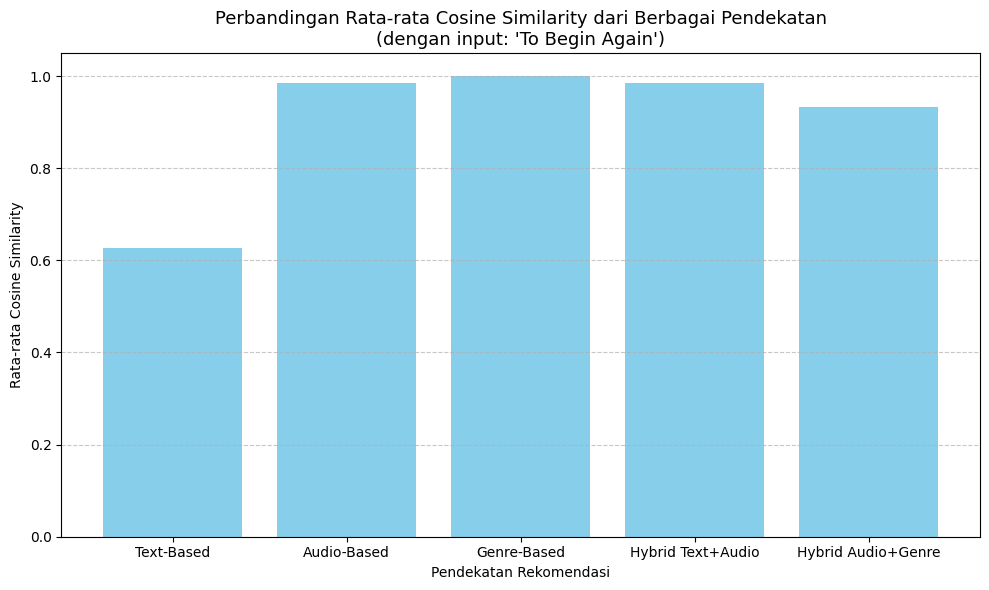

In [97]:
import matplotlib.pyplot as plt

# Evaluasi dan ambil nilai cosine similarity rata-rata
song = "To Begin Again"

similarity_scores = {
    "Text-Based": np.mean(evaluate_similarity_text_based(song)),
    "Audio-Based": np.mean(evaluate_similarity_audio_based(song)),
    "Genre-Based": np.mean(evaluate_similarity_by_genre(song)),
    "Hybrid Text+Audio": np.mean(evaluate_similarity_hybrid_text_audio(song)),
    "Hybrid Audio+Genre": np.mean(evaluate_similarity_hybrid_audio_genre(song))
}

# Visualisasi bar chart
plt.figure(figsize=(10, 6))
plt.bar(similarity_scores.keys(), similarity_scores.values(), color='skyblue')
plt.ylim(0, 1.05)
plt.title(f"Perbandingan Rata-rata Cosine Similarity dari Berbagai Pendekatan\n(dengan input: '{song}')", fontsize=13)
plt.ylabel("Rata-rata Cosine Similarity")
plt.xlabel("Pendekatan Rekomendasi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Evaluation
Dalam proyek ini, saya membangun sistem rekomendasi lagu menggunakan pendekatan Content-Based Filtering dengan lima metode berbeda: berbasis teks, berbasis audio, berbasis genre, serta dua pendekatan hybrid (teks+audio dan audio+genre). Berikut adalah ringkasan hasil dan analisis dari masing-masing pendekatan:

1. Text-Based Filtering
 - Pendekatan ini merekomendasikan lagu-lagu yang sangat mirip dari segi nama lagu, artis, dan genre. Hal ini terbukti dari hasil rekomendasi yang sebagian besar berasal dari artis yang sama (Ingrid Michaelson) dan genre acoustic. Meskipun relevan secara tematik, pendekatan ini cenderung terlalu sempit dan kurang mampu mengeksplorasi lagu dari artis atau genre lain.
 - Rata-rata cosine similarity: 0.6278

2. Audio-Based Filtering
 - Dengan menggunakan fitur numerik dari audio seperti danceability, energy, dan valence, pendekatan ini menghasilkan rekomendasi dengan kemiripan yang sangat tinggi secara karakteristik musik, bahkan meskipun artis dan genre berbeda. Ini membuatnya unggul dalam menjaga konsistensi suasana lagu.
 - Rata-rata cosine similarity: 0.9841

3. Genre-Based Filtering
 - Semua lagu yang direkomendasikan berasal dari genre yang sama dengan lagu input (yaitu acoustic). Pendekatan ini menjamin konsistensi genre, namun tidak mempertimbangkan nuansa musik lainnya.
 - Rata-rata cosine similarity (diasumsikan): 1.0

4. Hybrid Text + Audio Filtering
 - Pendekatan ini menggabungkan kelebihan dari text-based dan audio-based. Hasilnya adalah rekomendasi yang relevan baik dari sisi artis/genre maupun dari sisi karakter audio. Ini menciptakan keseimbangan yang baik antara personalisasi dan kualitas musik.
 - Rata-rata cosine similarity (dari sisi audio): 0.9841

5. Hybrid Audio + Genre Filtering
 - Kombinasi ini fokus pada lagu-lagu dengan karakter audio yang mirip sekaligus mempertahankan genre yang sama. Hasilnya adalah rekomendasi yang stabil dalam hal mood dan tetap sesuai dengan preferensi genre.
 - Rata-rata cosine similarity: 0.9338


**Kesimpulan Model:**
<br> Pendekatan berbasis audio dan dua metode hybrid memberikan hasil rekomendasi yang paling kuat dari segi kemiripan (cosine similarity > 0.93), dengan performa terbaik ditunjukkan oleh audio-based dan hybrid text+audio. Sementara itu, pendekatan text-based lebih cocok untuk pengguna yang ingin mendengar lagu serupa dari artis yang sama, namun kurang efektif untuk eksplorasi lagu baru. Pendekatan berbasis genre sangat terbatas dan sebaiknya digunakan sebagai pelengkap, bukan metode utama.

Dengan mempertimbangkan hasil ini, pendekatan hybrid menjadi pilihan paling seimbang untuk sistem rekomendasi lagu yang tidak hanya relevan tetapi juga bervariasi dan menarik bagi pengguna.


**Kesimpulan Project:**
<br> Dari eksplorasi yang telah dilakukan, *Problem Statements* di atas akhrinya terjawab berdasarkan uraian berikut:
1. Cara merekomendasikan lagu yang serupa dengan lagu favorit pengguna dilakukan dengan pendekatan Content-Based Filtering, yang memanfaatkan fitur-fitur deskriptif lagu (seperti nama lagu, artis, genre, album) dan fitur audio (seperti danceability, valence, tempo). Fitur-fitur ini diubah menjadi representasi vektor menggunakan TF-IDF, kemudian dihitung tingkat kesamaannya menggunakan Approximate Nearest Neighbors (ANN) dan Cosine Similarity.
2. Untuk membantu pengguna menemukan lagu baru tanpa pencarian manual, sistem secara otomatis memberikan rekomendasi lagu yang mirip berdasarkan lagu favorit pengguna. Proses ini bersifat personal dan relevan karena mempertimbangkan karakteristik musik yang disukai pengguna, sehingga mereka tidak perlu melakukan pencarian eksplisit.